In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd

In [3]:
df = gpd.read_file('/Users/Safia/code/Safiaaaaa/YouthInTheCity/raw_data/maps/density.shp')

In [9]:
df

,schl5,ew2021,flalle,ew_ha_2021,typklar,geometry
0,0100980011000100,0.0,4623.972334,0.00,Freie Zeilenbebauung mit landschaftlichem Sied...,"POLYGON ((389326.214 5821756.291, 389344.806 5..."
1,0100980011000200,0.0,13430.943579,0.00,Parkplatz,"POLYGON ((389261.965 5821859.562, 389326.319 5..."
2,0100980011000300,18.0,5603.764396,32.12,Geschosswohnungsbau der 1990er Jahre und jünger,"POLYGON ((389261.965 5821859.562, 389236.247 5..."
3,0100980021000200,842.0,34344.730303,245.16,"Heterogene, innerstädtische Mischbebauung, Lüc...","POLYGON ((389382.276 5821858.149, 389362.969 5..."
4,0100980021000300,0.0,48930.206258,0.00,Krankenhaus,"POLYGON ((389382.276 5821858.149, 389605.756 5..."
...,...,...,...,...,...,...
26373,2301959021000100,0.0,52177.344598,0.00,Gleiskörper,"POLYGON ((407201.225 5821820.458, 407365.129 5..."
26374,2301959021000300,0.0,28588.052186,0.00,Gleiskörper,"POLYGON ((406991.263 5821908.416, 407054.736 5..."
26375,2301959021000400,0.0,6072.084343,0.00,Bahnhof und Bahnanlagen ohne Gleiskörper,"POLYGON ((407201.225 5821820.458, 407211.632 5..."
26376,2301959031000100,0.0,29066.893191,0.00,Gleiskörper,"POLYGON ((405572.145 5821692.678, 405642.798 5..."


<AxesSubplot:>

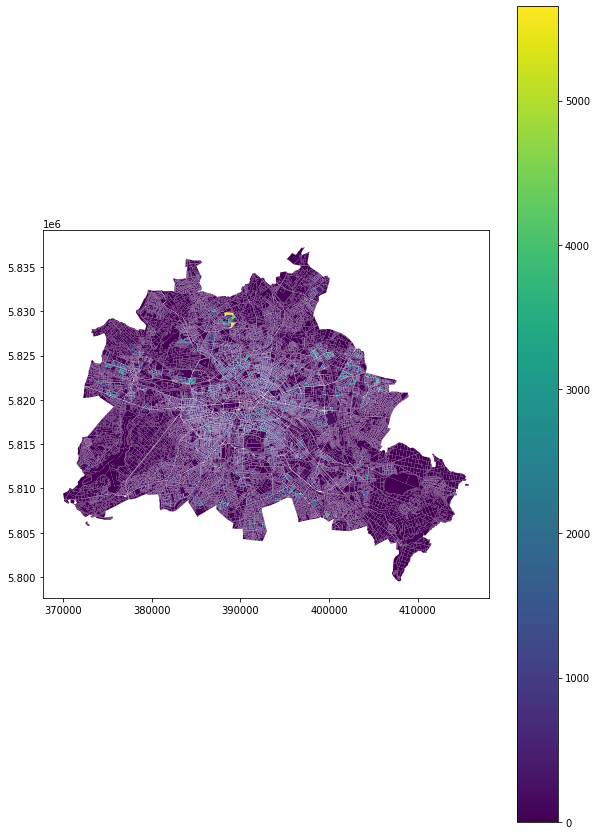

In [10]:
df.plot(column='ew2021', legend=True, figsize=(10,15))

In [2]:
def raster(poly):
    for index in range(len(poly) - 1):
        t1 = poly[index]
        t2 = poly[index + 1]
        xdef = t1[0] - t2[0]
        ydef = t1[1] - t2[1]
        if abs(xdef) > 1:
            lo = min(t1[0], t2[0])
            hi = max(t1[0], t2[0])
            j = lo
            while(j <= hi):
                new = (j, t1[1])
                poly.append(new)
                j += 1
        if abs(ydef) > 1:
            lo = min(t1[1], t2[1])
            hi = max(t1[1], t2[1])
            j = lo
            while(j <= hi):
                new = (t1[0], j)
                poly.append(new)
                j += 1
    return poly


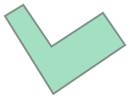

In [19]:
np.a(df.iloc[0].geometry)

In [12]:
raster(df[0].T)

KeyError: 0

In [11]:
df.to_csv('full_unprocessed.csv')

In [14]:
df.E_E18U25

0       421.558265
1       639.289489
2        84.399065
3       398.327049
4      1168.754349
          ...     
531     477.063434
532      86.105347
533     378.810839
534     244.748542
535     369.839879
Name: E_E18U25, Length: 536, dtype: float64

In [27]:
metrics = pd.DataFrame(
    {'Model' : ['OLS', 'OLS Regimes', '', 'Spatial error', 'SPREG error regimes', 'SPREG lag', 
                'SPREG lag regimes'],
    'R2': ['0.36', 'East 0.36' ,'West 0.37', '0.36*', '0.38*', '0.47*', '0.49*'],
    'RMSE':['13.32','13.13','','13.32','13.13','12.37','11.95'],
    'MAE':['10.50','10.20','','10.50','10.20','9.71','9.22'    ]})

In [28]:
metrics.to_csv('../raw_data/metrics.csv')

In [29]:
metrics

,Model,R2,RMSE,MAE
0,OLS,0.36,13.32,10.50
1,OLS Regimes,East 0.36,13.13,10.20
2,,West 0.37,,
3,Spatial error,0.36*,13.32,10.50
4,SPREG error regimes,0.38*,13.13,10.20
5,SPREG lag,0.47*,12.37,9.71
6,SPREG lag regimes,0.49*,11.95,9.22
